In [163]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [164]:
def load_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X_train=data[:,:4]
    y_train=data[:,4]
    return X_train,y_train

In [140]:
X_train,y_train=load_data()
X_features=["sqrt","bedroom","floors","age"]
display(X_train,y_train)

array([[1.244e+03, 3.000e+00, 1.000e+00, 6.400e+01],
       [1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01],
       [1.725e+03, 3.000e+00, 2.000e+00, 4.200e+01],
       [1.959e+03, 3.000e+00, 2.000e+00, 1.500e+01],
       [1.314e+03, 2.000e+00, 1.000e+00, 1.400e+01],
       [8.640e+02, 2.000e+00, 1.000e+00, 6.600e+01],
       [1.836e+03, 3.000e+00, 1.000e+00, 1.700e+01],
       [1.026e+03, 3.000e+00, 1.000e+00, 4.300e+01],
       [3.194e+03, 4.000e+00, 2.000e+00, 8.700e+01],
       [7.880e+02, 2.000e+00, 1.000e+00, 8.000e+01],
       [1.200e+03, 2.000e+00, 2.000e+00, 1.700e+01],
       [1.557e+03, 2.000e+00, 1.000e+00, 1.800e+01],
       [1.430e+03, 3.000e+00, 1.000e+00, 2.000e+01],
       [1.220e+03, 2.000e+00, 1.000e+00, 1.500e+01],
       [1.092e+03, 2.000e+00, 1.000e+00, 6.400e+01],
       [8.480e+02, 1.000e+00, 1.000e+00, 1.700e+01],
       [1.682e+03, 3.000e+00, 2.000e+00, 2.300e+01],
       [1.768e+03, 3.000e+00, 2.000e+00, 1.800e+01],
       [1.040e+03, 3.000e+00, 1.000e+00, 4.400

array([300.   , 509.8  , 394.   , 540.   , 415.   , 230.   , 560.   ,
       294.   , 718.2  , 200.   , 302.   , 468.   , 374.2  , 388.   ,
       282.   , 311.8  , 401.   , 449.8  , 301.   , 502.   , 340.   ,
       400.282, 572.   , 264.   , 304.   , 298.   , 219.8  , 490.7  ,
       216.96 , 368.2  , 280.   , 526.87 , 237.   , 562.426, 369.8  ,
       460.   , 374.   , 390.   , 158.   , 426.   , 390.   , 277.774,
       216.96 , 425.8  , 504.   , 329.   , 464.   , 220.   , 358.   ,
       478.   , 334.   , 426.98 , 290.   , 463.   , 390.8  , 354.   ,
       350.   , 460.   , 237.   , 288.304, 282.   , 249.   , 304.   ,
       332.   , 351.8  , 310.   , 216.96 , 666.336, 330.   , 480.   ,
       330.3  , 348.   , 304.   , 384.   , 316.   , 430.4  , 450.   ,
       284.   , 275.   , 414.   , 258.   , 378.   , 350.   , 412.   ,
       373.   , 225.   , 390.   , 267.4  , 464.   , 174.   , 340.   ,
       430.   , 440.   , 216.   , 329.   , 388.   , 390.   , 356.   ,
       257.8  ])

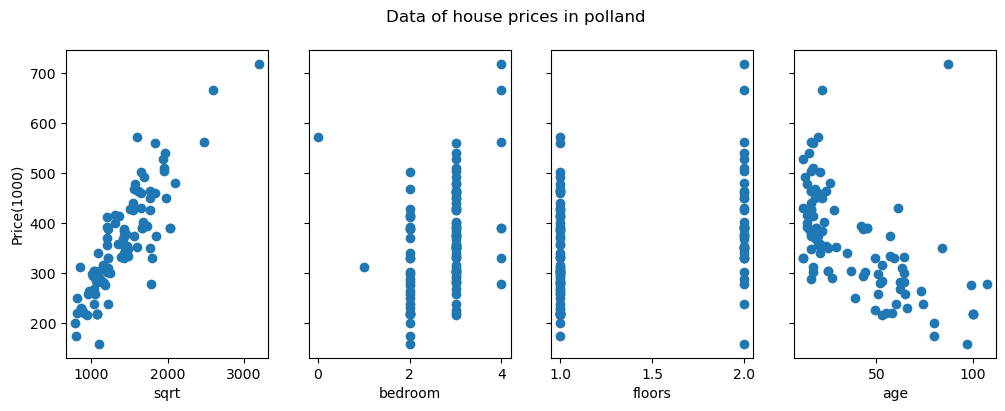

In [141]:
fig,ax=plt.subplots(1,4,figsize=(12,4),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train[:])
    ax[i].set_xlabel(X_features[i])
fig.suptitle("Data of house prices in polland")
ax[0].set_ylabel("Price(1000)")
plt.show()

In [142]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0
    for i in range(m):
        y_pred=np.dot(w,X[i])+b
        cost=cost+(y_pred-y[i])**2
    cost=cost/(2*m)
    return cost

In [143]:
def compute_gradient(X,y,w,b):
    m,n = X.shape       
    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i][j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw/m                                
    dj_db = dj_db/m 
    return dj_dw,dj_db                               

In [144]:
def compute_gradient_descend(X,y,w,b,iterations,alpha):
    m = len(X)
    w=copy.deepcopy(w)
    save_interval=math.ceil(iterations/10000)
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[]
    print(f"Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
    for i in range(iterations):
        dj_dw,dj_db=compute_gradient(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        
        if i==0 or i%save_interval==0:
            hist["cost"].append(compute_cost(X,y,w,b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(iterations/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = compute_cost(X, y, w, b)
            print(f"{i:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")
    return w,b,hist


In [145]:
def run_gradient_descend(X,y,num_iters=1000,alpha=1e-6):
    m,n=X.shape
    w_in=np.zeros((n,))
    b_in=0
    
    w_out, b_out, hist_out = compute_gradient_descend(X ,y, w_in,b_in, num_iters,alpha)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.2f}")
    return w_out,b_out,hist_out

In [146]:
def z_score_normalization(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return mu,sigma,X_norm

In [147]:
X_mean,X_sigma,X_norm=z_score_normalization(X_train)
print(f"Normalize data{X_norm},{X_mean},{X_sigma}")

Normalize data[[-4.23632450e-01  4.33808841e-01 -7.89272336e-01  9.93726440e-01]
 [ 1.28427160e+00  4.33808841e-01  1.26698980e+00 -8.29542143e-01]
 [ 7.44933479e-01  4.33808841e-01  1.26698980e+00  1.40281572e-01]
 [ 1.31342501e+00  4.33808841e-01  1.26698980e+00 -9.07128040e-01]
 [-2.53570880e-01 -1.10001528e+00 -7.89272336e-01 -9.45920989e-01]
 [-1.34682383e+00 -1.10001528e+00 -7.89272336e-01  1.07131234e+00]
 [ 1.01460254e+00  4.33808841e-01 -7.89272336e-01 -8.29542143e-01]
 [-9.53252767e-01  4.33808841e-01 -7.89272336e-01  1.79074520e-01]
 [ 4.31379699e+00  1.96763296e+00  1.26698980e+00  1.88596426e+00]
 [-1.53146210e+00 -1.10001528e+00 -7.89272336e-01  1.61441362e+00]
 [-5.30528294e-01 -1.10001528e+00  1.26698980e+00 -8.29542143e-01]
 [ 3.36785712e-01 -1.10001528e+00 -7.89272336e-01 -7.90749194e-01]
 [ 2.82454353e-02  4.33808841e-01 -7.89272336e-01 -7.13163297e-01]
 [-4.81939274e-01 -1.10001528e+00 -7.89272336e-01 -9.07128040e-01]
 [-7.92909002e-01 -1.10001528e+00 -7.89272336e-0

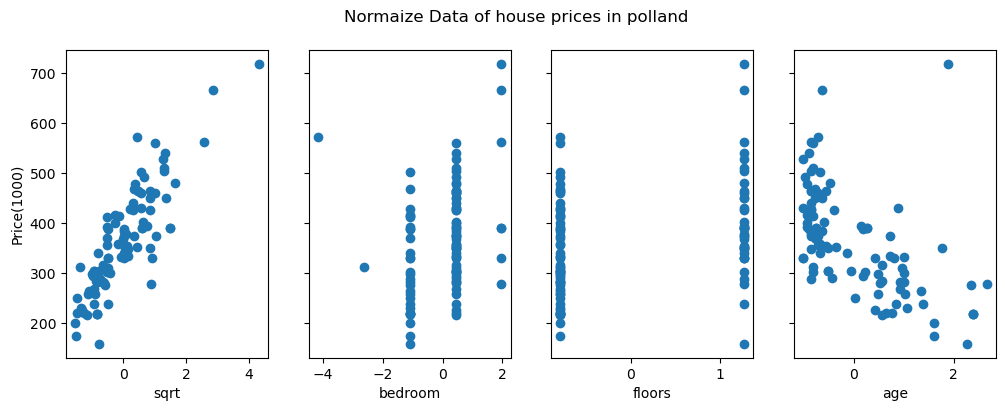

In [148]:
fig,ax=plt.subplots(1,4,figsize=(12,4),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[:,i],y_train[:])
    ax[i].set_xlabel(X_features[i])
fig.suptitle("Normaize Data of house prices in polland")
ax[0].set_ylabel("Price(1000)")
plt.show()

In [149]:
w_out,b_out,hist=run_gradient_descend(X_norm,y_train,1000,alpha=1e-1)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.7e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

In [150]:
def plot_cost_i_w(X,y,hist):
    ws = np.array([ p[0] for p in hist["params"]])
    rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
    wr = np.linspace(-rng+0.27,rng+0.27,20)
    cst = [compute_cost(X,y,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]

    fig,ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].plot(hist["iter"], (hist["cost"]));  ax[0].set_title("Cost vs Iteration")
    ax[0].set_xlabel("iteration"); ax[0].set_ylabel("Cost")
    ax[1].plot(wr, cst); ax[1].set_title("Cost vs w[0]")
    ax[1].set_xlabel("w[0]"); ax[1].set_ylabel("Cost")
    ax[1].plot(ws[:,0],hist["cost"])
    plt.show()

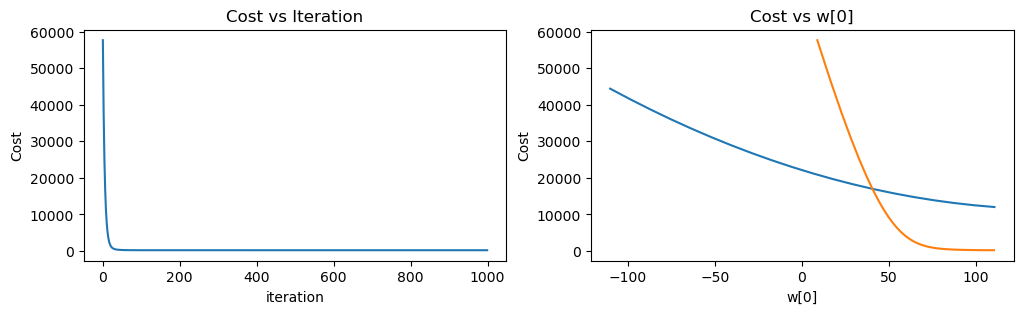

In [151]:
plot_cost_i_w(X_norm,y_train,hist)

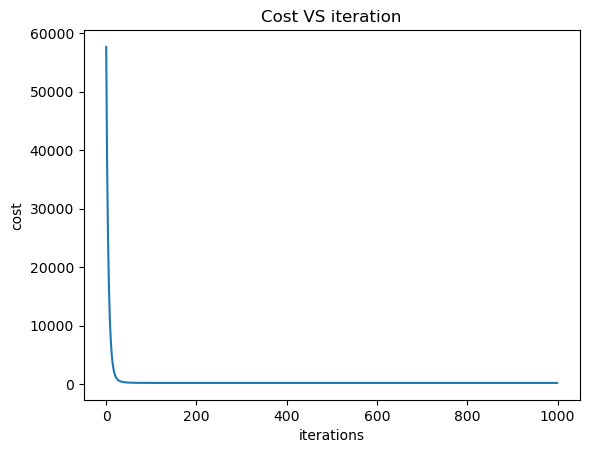

In [152]:
plt.plot(hist["iter"], hist["cost"])
plt.xlabel("iterations")
plt.ylabel('cost')
plt.title("Cost VS iteration")
plt.show()

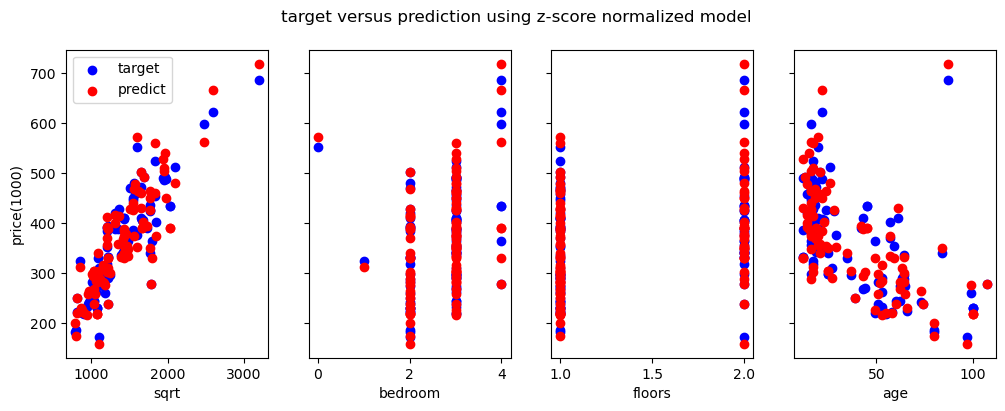

In [153]:
m=X_train.shape[0]
yp=np.zeros(m)
for i in range(m):
    yp[i]=np.dot(w_out,X_norm[i])+b_out
fig,ax=plt.subplots(1,4,figsize=(12,4),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],yp,color='blue',label="target")
    ax[i].scatter(X_train[:,i],y_train,color="red",label="predict")
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("price(1000)");ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

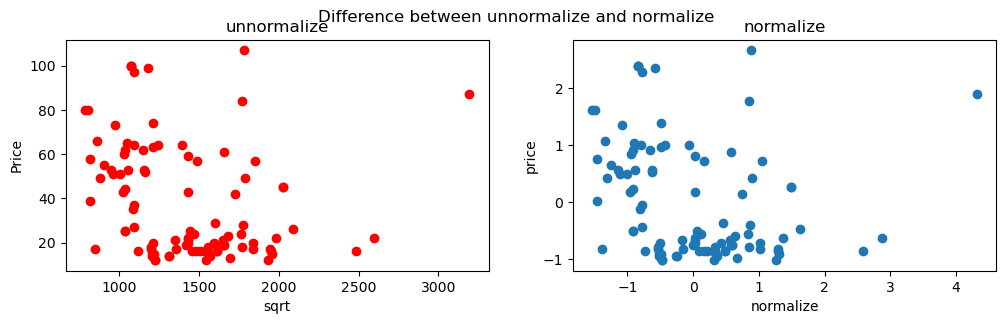

In [154]:
fig,ax=plt.subplots(1,2,figsize=(12,3))
fig.suptitle("Difference between unnormalize and normalize")
ax[0].scatter(X_train[:,0],X_train[:,3],c="r")
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel("Price")
ax[0].set_title("unnormalize")
ax[1].scatter(X_norm[:,0],X_norm[:,3])
ax[1].set_xlabel("normalize")
ax[1].set_ylabel("price")
ax[1].set_title("normalize")
plt.show()

In [155]:
print(f"Peak to Peak range by column in unnormalized  X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized    X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in unnormalized  X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized    X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [156]:
x_house=np.array([1.947e+03, 3.000e+00, 2.000e+00, 1.700e+01])
x_house_norm=(x_house-X_mean)/X_sigma
print(x_house_norm)

[ 1.2842716   0.43380884  1.2669898  -0.82954214]


In [157]:
x_house_predict=np.dot(x_house_norm,w_out)+b_out
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:.0f}")

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $485978


In [158]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in unnormalized  X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized    X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in unnormalized  X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized    X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [165]:
sgdr=SGDRegressor(max_iter=1000) # Doing above code by using sklearn library
sgdr.fit(X_norm,y_train)
print(sgdr)

SGDRegressor()


In [160]:
b_norm_ = sgdr.intercept_
w_norm_ = sgdr.coef_
print(f"model parameters:                   w: {w_norm_}, b:{b_norm_}")

model parameters:                   w: [110.15067671 -21.07317136 -32.44508344 -38.06332282], b:[363.15368763]


In [161]:
y_pred_sgdr=sgdr.predict(X_norm)
y_pred=np.dot(X_norm,w_norm_)+b_norm_
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgdr).all()}")
print(f"Prediction on training set:\n{y_pred[:4]}")
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.13203502 485.94288604 389.61971388 492.10733115]
Target values 
[300.  509.8 394.  540. ]


In [162]:
x_house_predict=np.dot(x_house_norm,w_norm_)+b_norm_
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000}")

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $[485942.88604124]
